In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# Import dataset
df = pd.read_csv(r"C:\Users\fecez\Downloads\archive (1)\netflix_titles.csv")

# Observe dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
# Check for null values
df.isna().sum()

show_id                     0
type                        0
title                       0
director                    0
cast                        0
country                     0
date_added                  0
release_year                0
rating                      0
duration                    0
listed_in                   0
description                 0
index_imdb_x                0
id_imdb_x                   0
title_imdb_x                0
type_imdb_x                 0
description_imdb_x          0
release_year_imdb_x         0
age_certification_imdb_x    0
runtime_imdb_x              0
imdb_id_imdb_x              0
imdb_score_imdb_x           0
imdb_votes_imdb_x           0
index_imdb_y                0
id_imdb_y                   0
title_imdb_y                0
type_imdb_y                 0
description_imdb_y          0
release_year_imdb_y         0
age_certification_imdb_y    0
runtime_imdb_y              0
imdb_id_imdb_y              0
imdb_score_imdb_y           0
imdb_votes

In [39]:
df[df.country.isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,id_imdb_y,title_imdb_y,type_imdb_y,description_imdb_y,release_year_imdb_y,age_certification_imdb_y,runtime_imdb_y,imdb_id_imdb_y,imdb_score_imdb_y,imdb_votes_imdb_y


In [40]:
imdb = pd.read_csv(r"C:\Users\fecez\Downloads\archive\Netflix TV Shows and Movies.csv", low_memory=False)
imdb.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [41]:
imdb[imdb['release_year'].astype(str).str.contains(' ')]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes


In [42]:
imdb.loc[imdb['release_year'].astype(str).str.contains(' '), 'release_year'] = imdb.loc[imdb['release_year'].astype(str).str.contains(' '), 'release_year'].astype(str).str.split(' ', n=1).str[-1]


In [43]:
df.release_year = pd.to_datetime(df['release_year'], format='%Y').dt.year
imdb.release_year = pd.to_datetime(imdb['release_year'], format='%Y').dt.year


In [44]:
imdb = imdb.drop_duplicates(subset=['title', 'release_year'])


In [45]:
df = df.merge(imdb.add_suffix('_imdb'), how='left', left_on=['title','release_year'], right_on=['title_imdb','release_year_imdb'])


In [68]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,id_imdb,title_imdb,type_imdb,description_imdb,release_year_imdb,age_certification_imdb,runtime_imdb,imdb_id_imdb,imdb_score_imdb,imdb_votes_imdb
0,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,tm1021871,The Starling,MOVIE,"After Lilly suffers a loss, a combative Starli...",2021,PG-13,102,tt5164438,6.3,11733.0
1,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,...,tm93055,Grown Ups,MOVIE,After their high school basketball coach passe...,2010,PG-13,102,tt1375670,5.9,247229.0
2,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,...,tm175843,Dark Skies,MOVIE,"From the producers of Paranormal Activity, Ins...",2013,PG-13,97,tt4190332,6.3,75139.0
3,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,...,tm244519,Birth of the Dragon,MOVIE,Set against the backdrop of San Franciscoâ€™s ...,2017,PG-13,120,tt2720826,5.6,8112.0
4,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,"September 15, 2021",2011,TV-14,102 min,...,tm177044,Naruto Shippuden the Movie: Blood Prison,MOVIE,After his capture for attempted assassination ...,2011,PG-13,108,tt1999167,7.1,5021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,...,tm147211,The Men Who Stare at Goats,MOVIE,A reporter in Iraq might just have the story o...,2009,R,94,tt1234548,6.2,131564.0
763,s8487,Movie,The Ring,Gore Verbinski,"Naomi Watts, Martin Henderson, David Dorfman, ...",United States,"January 1, 2020",2002,PG-13,116 min,...,tm109304,The Ring,MOVIE,Rachel Keller is a journalist investigating a ...,2002,PG-13,111,tt0298130,7.1,341888.0
764,s8512,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,"April 1, 2020",2010,PG-13,121 min,...,tm86803,The Social Network,MOVIE,The tale of a new breed of cultural insurgent:...,2010,PG-13,121,tt1285016,7.8,681286.0
765,s8707,Movie,We the Animals,Jeremiah Zagar,"Evan Rosado, Josiah Gabriel, Isaiah Kristian, ...",United States,"February 11, 2019",2018,R,93 min,...,tm370232,We the Animals,MOVIE,"Manny, Joel and Jonah tear their way through c...",2018,R,94,tt7681824,6.9,4181.0


In [47]:
df.dropna(inplace=True)

In [48]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,id_imdb,title_imdb,type_imdb,description_imdb,release_year_imdb,age_certification_imdb,runtime_imdb,imdb_id_imdb,imdb_score_imdb,imdb_votes_imdb
0,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,tm1021871,The Starling,MOVIE,"After Lilly suffers a loss, a combative Starli...",2021,PG-13,102,tt5164438,6.3,11733.0
1,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,...,tm93055,Grown Ups,MOVIE,After their high school basketball coach passe...,2010,PG-13,102,tt1375670,5.9,247229.0
2,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,...,tm175843,Dark Skies,MOVIE,"From the producers of Paranormal Activity, Ins...",2013,PG-13,97,tt4190332,6.3,75139.0
3,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,...,tm244519,Birth of the Dragon,MOVIE,Set against the backdrop of San Franciscoâ€™s ...,2017,PG-13,120,tt2720826,5.6,8112.0
4,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,"September 15, 2021",2011,TV-14,102 min,...,tm177044,Naruto Shippuden the Movie: Blood Prison,MOVIE,After his capture for attempted assassination ...,2011,PG-13,108,tt1999167,7.1,5021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,...,tm147211,The Men Who Stare at Goats,MOVIE,A reporter in Iraq might just have the story o...,2009,R,94,tt1234548,6.2,131564.0
763,s8487,Movie,The Ring,Gore Verbinski,"Naomi Watts, Martin Henderson, David Dorfman, ...",United States,"January 1, 2020",2002,PG-13,116 min,...,tm109304,The Ring,MOVIE,Rachel Keller is a journalist investigating a ...,2002,PG-13,111,tt0298130,7.1,341888.0
764,s8512,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,"April 1, 2020",2010,PG-13,121 min,...,tm86803,The Social Network,MOVIE,The tale of a new breed of cultural insurgent:...,2010,PG-13,121,tt1285016,7.8,681286.0
765,s8707,Movie,We the Animals,Jeremiah Zagar,"Evan Rosado, Josiah Gabriel, Isaiah Kristian, ...",United States,"February 11, 2019",2018,R,93 min,...,tm370232,We the Animals,MOVIE,"Manny, Joel and Jonah tear their way through c...",2018,R,94,tt7681824,6.9,4181.0


In [49]:
country_distribution = df['country'].value_counts()
print(country_distribution)

United States                                   311
India                                           151
United Kingdom, United States                    18
Turkey                                           17
Japan                                            14
                                               ... 
United States, Canada, United Kingdom             1
United States, United Kingdom, Canada, China      1
United States, Belgium, Canada, France            1
Hong Kong, Iceland, United States                 1
United States, Germany, Mexico                    1
Name: country, Length: 148, dtype: int64


In [50]:
type_distribution = df['type'].value_counts()
print(type_distribution)

Movie      724
TV Show     43
Name: type, dtype: int64


In [52]:
release_year_counts = df['release_year'].value_counts().sort_index()
print(release_year_counts)

1964      1
1967      1
1972      1
1975      1
1979      1
1980      2
1984      1
1987      1
1991      2
1992      1
1993      5
1994      2
1995      2
1996      3
1997      1
1998      5
2000      1
2001      6
2002      3
2003      5
2004     10
2005      5
2006     11
2007     13
2008     17
2009     22
2010     23
2011     24
2012     25
2013     28
2014     39
2015     46
2016     56
2017     74
2018    111
2019     81
2020     98
2021     39
Name: release_year, dtype: int64


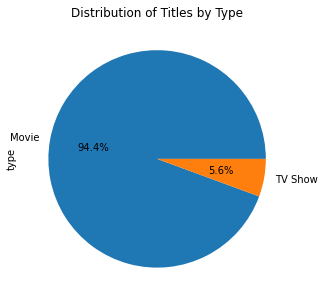

In [58]:
plt.figure(figsize=(8, 5))
type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Titles by Type')
plt.show()

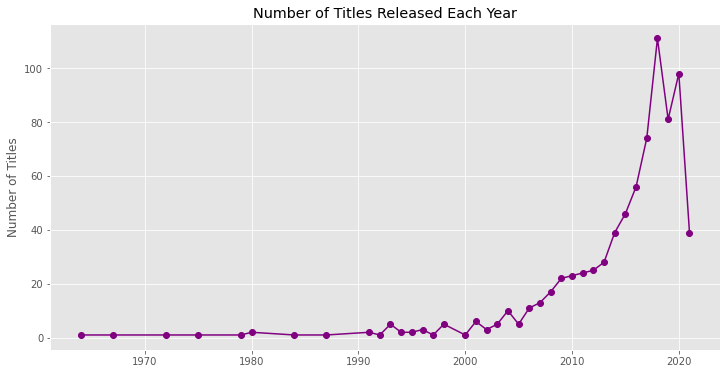

In [72]:
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o', color='purple')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Each Year')
plt.grid(True)
plt.show()


In [62]:
#checking for missing values
print(df.isna().sum())

show_id                     0
type                        0
title                       0
director                    0
cast                        0
country                     0
date_added                  0
release_year                0
rating                      0
duration                    0
listed_in                   0
description                 0
index_imdb_x                0
id_imdb_x                   0
title_imdb_x                0
type_imdb_x                 0
description_imdb_x          0
release_year_imdb_x         0
age_certification_imdb_x    0
runtime_imdb_x              0
imdb_id_imdb_x              0
imdb_score_imdb_x           0
imdb_votes_imdb_x           0
index_imdb_y                0
id_imdb_y                   0
title_imdb_y                0
type_imdb_y                 0
description_imdb_y          0
release_year_imdb_y         0
age_certification_imdb_y    0
runtime_imdb_y              0
imdb_id_imdb_y              0
imdb_score_imdb_y           0
imdb_votes

In [69]:
# subset dataset and split 
country = df.loc[df.country.notnull(), 'country'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
country = list(country)

# number of movies/TV shows without null values
len(country)

767